In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
import matplotlib.pyplot as plt
import os
from sklearn.tree import plot_tree , DecisionTreeClassifier # Plotting of DecisionTree

In [2]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA18\TreeBased")

In [3]:
os.listdir()

['bank.xlsx',
 'bank1.csv',
 'bank_xgb.csv',
 'corr.csv',
 'corr1.csv',
 'FeatImp.xlsx',
 'Feature_imp.csv']

In [4]:
banks=pd.read_excel(r'bank.xlsx', sheet_name="bank") 

In [5]:
banks.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [6]:
banks["job"].unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [7]:
banks["job"].nunique()

12

In [8]:
banks["job"].value_counts(dropna=False)

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [9]:
banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### Univariate Analysis 

<AxesSubplot:>

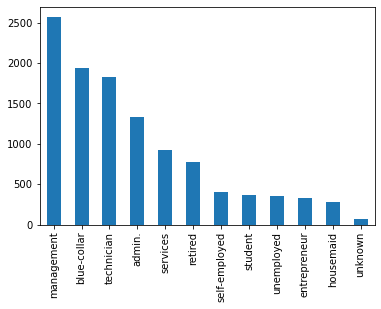

In [10]:
banks["job"].value_counts().plot(kind="bar")

In [11]:
banks.shape

(11162, 17)

In [10]:
banks["job"]=banks["job"].replace(["management", "admin."], "White-collar")

banks["job"]=banks["job"].replace(["services", "housemaid"], "Pink-collar")

banks["job"]=banks["job"].replace(["retired", "student", "unemployed", "unknown"], "Others")

banks["job"]=banks["job"].replace(["self-employed", "entrepreneur"], "self-depend")

<AxesSubplot:>

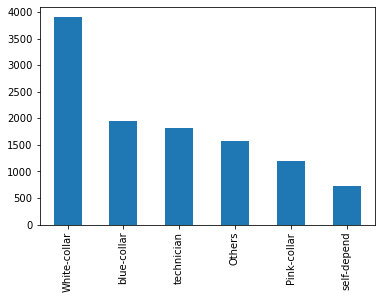

In [11]:
banks["job"].value_counts().plot(kind="bar")

In [13]:
banks["marital"].value_counts( dropna=False)

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64